##  ppt  그래프 종류 설명을 언제 할까나

In [1]:
import seaborn                   # 데이타 (여기서 seaborn 그래프를 하는 것이 아니라 데이타만 필요)
import matplotlib.pyplot as plt  # 그래프 라이브러리

tips = seaborn.load_dataset('tips') # 팁을 지불한 손님의 정보 데이타
tips.head()   # 지불금액 / 팁 / 성별 / 흡연 / 요일 / 시간대 / 인원수

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# 한글처리
from matplotlib import font_manager, rc  # rc : resource
fong_loc = "c:/Windows/Fonts/malgun.ttf" # 글꼴 경로
font_name = font_manager.FontProperties(fname=fong_loc).get_name()
# print(font_name) # 폰트매니저를 통해 인식하고 있는 글꼴 이름을 가져온다
rc('font', family=font_name) # 리소스에 글꼴을 등록

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

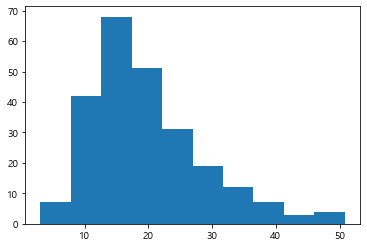

In [3]:
"""1. 일변량 그래프 - 하나의 변수만 사용한 그래프 

- 히스토그램(수치변수)

- 막대그래프(범주변수)

  [예] 전체지불금액(total_bill)에 대한 그래프
"""
plt.hist(tips['total_bill'])
# plt.hist(tips['total_bill'], bins=10)  # x 축의 단위 수
# plt.hist(tips['total_bill'], bins=10, color='blue')
# plt.title('전체지불금액')
# plt.xlabel('빈도수')
# plt.ylabel('지불금액')


# figure(기본 틀)을 만들어서 출력도 가능
# fig = plt.figure()
# axes = fig.add_subplot(1,1,1)
# axes.hist(tips['total_bill'])
# axes.set_title('전체지불금액2')
# axes.set_xlabel('빈도수2')
# axes.set_ylabel('지불금액2')


<BarContainer object of 2 artists>

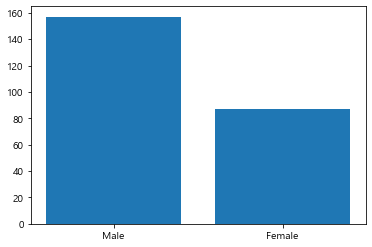

In [4]:

# pyplot으로 bar chart 그리기 
sex = tips['sex'].value_counts()
# sex
plt.bar(['Male', 'Female'],sex)
# ( 이런경우는 그냥 판다스이용 하는 것이 나을 듯)
# sex.plot(kind='bar')



Text(0, 0.5, '팁')

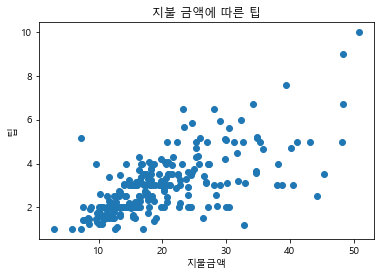

In [4]:
""" 2. 이변량 그래프 - 변수 2개를 이용한 그래프 ( 산점도 그래프 )
    [예] 지불금액에 따른 팁 금액을 나타내는 그래프
"""
plt.scatter(tips['total_bill'], tips['tip'])
plt.title('지불 금액에 따른 팁')
plt.xlabel('지불금액')
plt.ylabel('팁')

# fig = plt.figure()
# axes = fig.add_subplot(1,1,1)    # fig.scatter()는 안됨
# axes.scatter(tips['total_bill'], tips['tip'])
# axes.set_title('지불 금액에 따른 팁2')
# axes.set_xlabel('지불금액2')
# axes.set_ylabel('팁2')

'\n   그래프를 분석할수 있어야 한다.\n   최고 금액을 낸 사람이 남성이라고 남성이 여성보다 더 많이 팁을 준다고 할 수 있나?\n   이상치들을 어떻게 처리할까?\n   ( 이상치에 의해 평균값이 변경되기에 )\n   \n   예를 들어, 19대 국회의원 평균 재산\n   최고 4명을 제외하면 평균 18억인데 최고 한명인 정몽준의원 포함하면 평균 재산이 100억이 넘는다.\n   정몽준의원 신고 재산이 1조가 넘었기에\n'

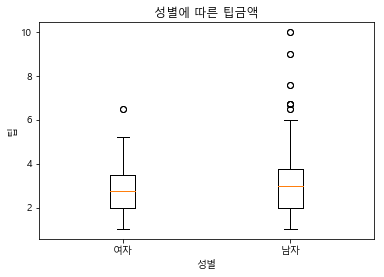

In [5]:
""" 3. 이산형 변수와 연속형 변수 - 박스플롯
    이산형 - 성별이나 국적처럼 명확하게 구분되는 값
    연속형 - 수치로 이루어진 값

    [예] 성별에 따른 팁을 나타내는 그래프
"""

female = tips[tips['sex']=='Female']['tip']
female
male = tips[tips['sex']=='Male']['tip']
male

plt.boxplot( [female, male] )
plt.boxplot( [female, male], labels=['여자','남자'] )
plt.title('성별에 따른 팁금액')
plt.xlabel('성별')
plt.ylabel('팁')

# fig = plt.figure()
# axes = fig.add_subplot(1,1,1)
# axes.boxplot( [female, male], labels=['여자','남자'] )
# axes.set_title('성별에 따른 팁금액2')
# axes.set_xlabel('성별2')
# axes.set_ylabel('팁2')

"""
   그래프를 분석할수 있어야 한다.
   최고 금액을 낸 사람이 남성이라고 남성이 여성보다 더 많이 팁을 준다고 할 수 있나?
   이상치들을 어떻게 처리할까?
   ( 이상치에 의해 평균값이 변경되기에 )
   
   예를 들어, 19대 국회의원 평균 재산
   최고 4명을 제외하면 평균 18억인데 최고 한명인 정몽준의원 포함하면 평균 재산이 100억이 넘는다.
   정몽준의원 신고 재산이 1조가 넘었기에
"""

Text(0, 0.5, 'Tip')

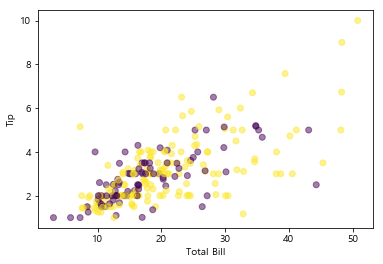

In [10]:
""" 4. 다변량 그래프 - 3개 이상의 변수로 그래프 - 산점도 그래프

      [예] 식사지불과 팁의 정도를 성별에 따라 그래프를 그린다면?
      
      * 성별의 문자열값을 0과 1로 변경하여 다른 색상으로 그리고자 한다
"""

# (1) 성별을 0과 1로 변환하는 함수 선언
def gender(sex):
    if sex=='Female':
        return 0
    else:
        return 1

# (2) 변경한 성별값의 변수(컬럼) 추가
tips['sex_col'] = tips['sex'].apply(gender)

# (1)(2) 한줄 표현
# tips['sex_color'] = np.where(tips['sex']=='Female',0,1)

# (3) 그래프 : x와 y 축, c=점의 색상, alpha=점의 투명도, s=점의 크기
#    테이블당의 인원수를 점의 크기로 표현한다면 s=tips['size']*10 추가
plt.scatter(x=tips['total_bill'],
            y=tips['tip'],
            c=tips['sex_color'],
            alpha=0.5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')

Text(0, 0.5, '팁')

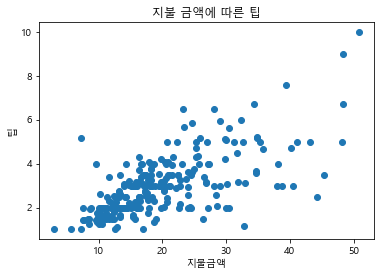

In [7]:
""" plt.scatter와 plt.plot """

# plt.plot(tips['total_bill'], tips['tip'],'o')
# plt.title('지불 금액에 따른 팁')
# plt.xlabel('지불금액')
# plt.ylabel('팁')